In [27]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
NUM_CLASSES = 6
CLASSES = ["sadnesss", "joy", "love", "anger", "fear"]
WEIGHTS = torch.tensor([0.00287505, 0.00246512, 0.01015641, 0.00615233, 0.00702346, 0.02318034])

In [29]:
# Load all data
train_data = pd.read_csv("data/training.csv")
test_data = pd.read_csv("data/test.csv")
validation_data = pd.read_csv("data/validation.csv")

# Separate X's and y's from each other
FEATURE_COLUMNS = ["text"]
LABEL_COLUMN = "label"

X_train = train_data[FEATURE_COLUMNS]
Y_train = train_data[LABEL_COLUMN]

X_test = test_data[FEATURE_COLUMNS]
Y_test = test_data[LABEL_COLUMN]

X_val = validation_data[FEATURE_COLUMNS]
Y_val = validation_data[LABEL_COLUMN]

# These are used to run cross validation
X_train_val = pd.concat([X_train, X_val]) 
Y_train_val = pd.concat([Y_train, Y_test])

# These are used to run val and test for Neural Nets
X_val_test = pd.concat([X_val, X_test])
Y_val_test = pd.concat([Y_val, Y_test])

In [30]:
X_train_maxtoks = X_train['text'].str.len().max()
X_test_maxtoks = X_test['text'].str.len().max()
X_val_maxtoks = X_val['text'].str.len().max() 

max_toks = max(X_train_maxtoks, X_test_maxtoks, X_val_maxtoks)
print(max_toks)

300


# Data Loaders

In [31]:
# Pytorch specific constants
from torch.utils.data import TensorDataset, DataLoader
from extractors.chartok import  CharTokenDataset
from utils.neuralnet import NeuralNetwork
from utils.rnn import LSTMNetwork
from utils.transformer import TransformerEncoder
from utils.trainer import training_loop, evaluate
import torch

BATCH_SIZE = 32
LEARNING_RATE = 1e-4
EPOCHS = 1000

# Standard 1 Layer Perceptron

In [67]:
# Because an MLP operates on fixed size inputs, we will use the entire fixed size input for this
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)

[autoreload of utils.transformer failed: Traceback (most recent call last):
  File "c:\Users\Joaquin\miniconda3\envs\agienv\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\Joaquin\miniconda3\envs\agienv\Lib\site-packages\IPython\extensions\autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "c:\Users\Joaquin\miniconda3\envs\agienv\Lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "c:\Users\Joaquin\miniconda3\envs\agienv\Lib\site-packages\IPython\extensions\autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "c:\Users\Joaquin\miniconda3\envs\agienv\Lib\site-packages\IPython\extensions\autoreload.py", line -1, in update_instances
KeyboardInterrupt
]


In [33]:
mlp = NeuralNetwork(max_toks, [], NUM_CLASSES, device="cuda")
training_loop(mlp, train_loader, val_loader, epochs=EPOCHS, learning_rate=LEARNING_RATE, path="models/slpseq")

Epoch 1
train_loss = 13.9535, val_loss = 10.8022
Epoch 2
train_loss = 9.9314, val_loss = 9.3420
Epoch 3
train_loss = 6.8273, val_loss = 8.0207
Epoch 4
train_loss = 7.8311, val_loss = 6.9920
Epoch 5
train_loss = 4.5947, val_loss = 5.9817
Epoch 6
train_loss = 4.9756, val_loss = 5.2777
Epoch 7
train_loss = 5.8346, val_loss = 4.4615
Epoch 8
train_loss = 3.2274, val_loss = 3.8887
Epoch 9
train_loss = 4.2113, val_loss = 3.4857
Epoch 10
train_loss = 2.4747, val_loss = 3.0273
Epoch 11
train_loss = 2.4019, val_loss = 2.7825
Epoch 12
train_loss = 2.0958, val_loss = 2.6051
Epoch 13
train_loss = 3.0529, val_loss = 2.4993
Epoch 14
train_loss = 1.9323, val_loss = 2.2548
Epoch 15
train_loss = 2.1267, val_loss = 2.2779
Epoch 16
train_loss = 1.8620, val_loss = 2.3167
Epoch 17
train_loss = 1.4648, val_loss = 2.1148
Epoch 18
train_loss = 1.6963, val_loss = 2.1023
Epoch 19
train_loss = 2.2139, val_loss = 1.9956
Epoch 20
train_loss = 1.7367, val_loss = 1.9880
Epoch 21
train_loss = 1.5239, val_loss = 2.0146

loss = 1.6553
accuracy = 0.3445
f1 = 0.2521
[[0.32790698 0.28116883 0.11111111 0.23076923 0.42857143 0.        ]
 [0.31162791 0.35519481 0.66666667 0.38461538 0.28571429 1.        ]
 [0.06744186 0.08441558 0.         0.         0.         0.        ]
 [0.13255814 0.13961039 0.11111111 0.07692308 0.14285714 0.        ]
 [0.1255814  0.10779221 0.         0.30769231 0.         0.        ]
 [0.03488372 0.03181818 0.11111111 0.         0.14285714 0.        ]]


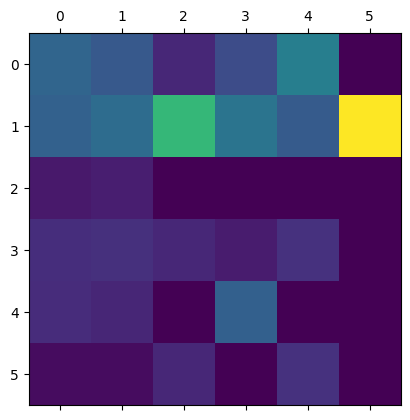

In [34]:
_, _, _, cmat = evaluate(model=mlp, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

# Standard MLP

In [35]:
# Because an MLP operates on fixed size inputs, we will use the entire fixed size input for this
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)

In [36]:
mlp = NeuralNetwork(max_toks, [100, 100, 100], NUM_CLASSES, device="cuda")
training_loop(mlp, train_loader, val_loader, epochs=EPOCHS, learning_rate=LEARNING_RATE, path="models/mlpseq")

Epoch 1
train_loss = 1.7771, val_loss = 1.6591
Epoch 2
train_loss = 1.6317, val_loss = 1.6356
Epoch 3
train_loss = 1.7473, val_loss = 1.6129
Epoch 4
train_loss = 1.5172, val_loss = 1.6177
Epoch 5
train_loss = 1.6969, val_loss = 1.6159
Epoch 6
train_loss = 1.8144, val_loss = 1.6107
Epoch 7
train_loss = 1.6213, val_loss = 1.5982
Epoch 8
train_loss = 1.7224, val_loss = 1.5936
Epoch 9
train_loss = 1.6084, val_loss = 1.5857
Epoch 10
train_loss = 1.4453, val_loss = 1.5855
Epoch 11
train_loss = 1.4773, val_loss = 1.5812
Epoch 12
train_loss = 1.6663, val_loss = 1.5823
Epoch 13
train_loss = 1.5502, val_loss = 1.5807
Epoch 14
train_loss = 1.5330, val_loss = 1.5847
Epoch 15
train_loss = 1.6405, val_loss = 1.5829
Epoch 16
train_loss = 1.4082, val_loss = 1.5831
Epoch 17
train_loss = 1.6473, val_loss = 1.5820
Epoch 18
train_loss = 1.5996, val_loss = 1.5807
Epoch 19
train_loss = 1.6273, val_loss = 1.5809
Epoch 20
train_loss = 1.8354, val_loss = 1.5817
Epoch 21
train_loss = 1.6578, val_loss = 1.5797
E

loss = 1.5655
accuracy = 0.3370
f1 = 0.2498
[[0.29693487 0.28834356 0.         0.33333333 0.2        0.        ]
 [0.33333333 0.3524199  0.         0.16666667 0.6        0.        ]
 [0.07279693 0.08248125 0.         0.         0.         0.        ]
 [0.13601533 0.13769598 0.         0.33333333 0.         0.        ]
 [0.13409962 0.10497614 0.         0.         0.         0.        ]
 [0.02681992 0.03408316 0.         0.16666667 0.2        0.        ]]


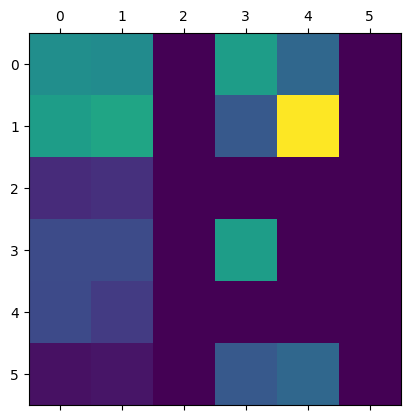

In [37]:
_, _, _, cmat = evaluate(model=mlp, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

# MLP with Weighting

In [38]:
mlp = NeuralNetwork(max_toks, [100, 100, 100], NUM_CLASSES, device="cuda")
training_loop(mlp, train_loader, val_loader, epochs=100, learning_rate=LEARNING_RATE, path="models/mlpseqwt", weights=WEIGHTS)

Epoch 1
train_loss = 1.8983, val_loss = 1.7939
Epoch 2
train_loss = 1.8004, val_loss = 1.7927
Epoch 3
train_loss = 1.8076, val_loss = 1.7933
Epoch 4
train_loss = 1.8109, val_loss = 1.7920
Epoch 5
train_loss = 1.7929, val_loss = 1.7919
Epoch 6
train_loss = 1.8069, val_loss = 1.7935
Epoch 7
train_loss = 1.8155, val_loss = 1.7924
Epoch 8
train_loss = 1.7893, val_loss = 1.7927
Epoch 9
train_loss = 1.7808, val_loss = 1.7925
Epoch 10
train_loss = 1.7802, val_loss = 1.7931
Epoch 11
train_loss = 1.7819, val_loss = 1.7930
Epoch 12
train_loss = 1.7850, val_loss = 1.7935
Epoch 13
train_loss = 1.7805, val_loss = 1.7936
Epoch 14
train_loss = 1.7712, val_loss = 1.7931
Epoch 15
train_loss = 1.7852, val_loss = 1.7949
Epoch 16
train_loss = 1.7995, val_loss = 1.7924
Epoch 17
train_loss = 1.7999, val_loss = 1.7932
Epoch 18
train_loss = 1.8206, val_loss = 1.7924
Epoch 19
train_loss = 1.8954, val_loss = 1.7920
Epoch 20
train_loss = 1.8096, val_loss = 1.7940
Epoch 21
train_loss = 1.7956, val_loss = 1.7925
E

loss = 1.7646
accuracy = 0.2470
f1 = 0.2438
[[0.29005059 0.28236915 0.30215827 0.27906977 0.33469388 0.20512821]
 [0.35244519 0.35261708 0.30935252 0.37209302 0.32653061 0.28205128]
 [0.08937605 0.06473829 0.09352518 0.08914729 0.06938776 0.15384615]
 [0.13827993 0.13085399 0.15827338 0.12403101 0.14693878 0.20512821]
 [0.09612142 0.12809917 0.12230216 0.11627907 0.08571429 0.15384615]
 [0.03372681 0.04132231 0.01438849 0.01937984 0.03673469 0.        ]]


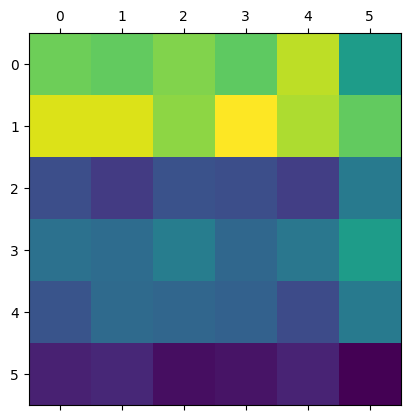

In [39]:
_, _, _, cmat = evaluate(model=mlp, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

# RNN

In [41]:
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks, dtype = torch.int32)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)


In [42]:
lstm = LSTMNetwork(40, 100, 10, NUM_CLASSES)
training_loop(lstm, train_loader, val_loader, epochs=EPOCHS, learning_rate=LEARNING_RATE, path="models/lstmseq")
torch.save(lstm.state_dict(), "models/lstmseq")

Epoch 1
train_loss = 1.4332, val_loss = 1.5807
Epoch 2
train_loss = 1.6706, val_loss = 1.5808
Epoch 3
train_loss = 1.5872, val_loss = 1.5799
Epoch 4
train_loss = 1.6782, val_loss = 1.5834
Epoch 5
train_loss = 1.6232, val_loss = 1.5815
Epoch 6
train_loss = 1.4581, val_loss = 1.5817
Epoch 7
train_loss = 1.7995, val_loss = 1.5818
Epoch 8
train_loss = 1.8153, val_loss = 1.5796
Epoch 9
train_loss = 1.7812, val_loss = 1.5806
Epoch 10
train_loss = 1.5804, val_loss = 1.5837
Epoch 11
train_loss = 1.5939, val_loss = 1.5806
Epoch 12
train_loss = 1.5466, val_loss = 1.5807
Epoch 13
train_loss = 1.7686, val_loss = 1.5803
Epoch 14
train_loss = 1.6050, val_loss = 1.5821
Epoch 15
train_loss = 1.6407, val_loss = 1.5804
Epoch 16
train_loss = 1.5188, val_loss = 1.5813
Epoch 17
train_loss = 1.5630, val_loss = 1.5801
Epoch 18
train_loss = 1.4813, val_loss = 1.5821
Epoch 19
train_loss = 1.4666, val_loss = 1.5837
Epoch 20
train_loss = 1.6385, val_loss = 1.5798
Epoch 21
train_loss = 1.8223, val_loss = 1.5821
E

KeyboardInterrupt: 

loss = 1.5594
accuracy = 0.3310
f1 = 0.2527
[[0.28633094 0.29352851 0.         0.33333333 0.         0.        ]
 [0.3294964  0.3559322  0.         0.66666667 0.5        0.        ]
 [0.08489209 0.0770416  0.         0.         0.         0.        ]
 [0.1381295  0.13713405 0.         0.         0.25       0.        ]
 [0.12086331 0.10708783 0.         0.         0.25       0.        ]
 [0.04028777 0.02927581 0.         0.         0.         0.        ]]


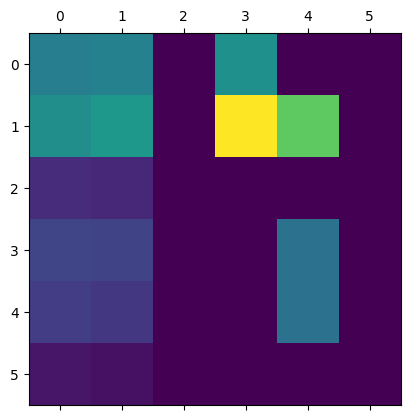

In [43]:

_, _, _, cmat = evaluate(model=lstm, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

In [59]:
lstm = LSTMNetwork(40, 100, 10, NUM_CLASSES)
_, _, _, cmat = evaluate(model=lstm, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

torch.Size([10, 6])


ValueError: Expected input batch_size (10) to match target batch_size (1).

# Transformer

In [80]:
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks, dtype = torch.int32)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)


In [61]:
transformer = TransformerEncoder(max_toks, NUM_CLASSES, 10, 5, 4, ff=10, dropout=0.1)
training_loop(transformer, train_loader, val_loader, epochs=EPOCHS, learning_rate=LEARNING_RATE)
torch.save(transformer.state_dict(), "models/xformerseq")

Epoch 1
train_loss = 1.6590, val_loss = 1.5858
Epoch 2
train_loss = 1.3555, val_loss = 1.5766
Epoch 3
train_loss = 1.6147, val_loss = 1.5815
Epoch 4
train_loss = 1.4530, val_loss = 1.5795
Epoch 5
train_loss = 1.6592, val_loss = 1.5803
Epoch 6
train_loss = 1.8088, val_loss = 1.5786
Epoch 7
train_loss = 1.6071, val_loss = 1.5804
Epoch 8
train_loss = 1.6058, val_loss = 1.5801
Epoch 9
train_loss = 1.5417, val_loss = 1.5810
Epoch 10
train_loss = 1.5391, val_loss = 1.5836
Epoch 11


KeyboardInterrupt: 

In [101]:
transformer = TransformerEncoder(max_toks, NUM_CLASSES, 10, 5, 4, ff=30, dropout=0.1)
_, _, _, cmat = evaluate(model=transformer, val_dl=test_loader, is_seq=True)
print(cmat)
plt.matshow(cmat)
plt.show()

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
